# Step 1: Importing Libraries

In [198]:
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.utils import resample
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import StratifiedKFold 
from collections import Counter
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from joblib import dump, load

import warnings
warnings.filterwarnings('ignore')

# Step 2: Data Preprocessing

In [199]:
df = pd.read_csv("Insurance Dataset.csv")
df.head(5)

,Area_Service,Hospital County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,197,0,Cellulitis & other skin infections,3,2.0,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1
2,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,3829.15,4056.52,1.059379,1,1
3,Western NY,Allegany,37.0,0 to 17,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,1108.20,1644.75,1.484167,0,1
4,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,122,0,Other pneumonia,2,3.0,Medical,0,N,Y,3418.18,3370.87,0.986161,1,1


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Area_Service                           1046119 non-null  object 
 1   Hospital County                        1046119 non-null  object 
 2   Hospital Id                            1046119 non-null  float64
 3   Age                                    1048575 non-null  object 
 4   Gender                                 1048575 non-null  object 
 5   Cultural_group                         1048575 non-null  object 
 6   ethnicity                              1048575 non-null  object 
 7   Days_spend_hsptl                       1048575 non-null  object 
 8   Admission_type                         1048575 non-null  object 
 9   Home or self care,                     1048575 non-null  object 
 10  ccs_diagnosis_code                     104

In [201]:
df.shape

(1048575, 24)

1. Drop Duplicates

In [202]:
df.drop_duplicates(inplace=True,ignore_index=True)
df.describe().apply(lambda s: s.apply('{0:.1f}'.format))

,Hospital Id,ccs_diagnosis_code,ccs_procedure_code,Code_illness,Mortality risk,Weight_baby,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
count,1041306.0,1043761.0,1043761.0,1043761.0,1043720.0,1043761.0,1043761.0,1043761.0,1043761.0,1043761.0,1043761.0
mean,652.5,198.6,97.1,2.1,1.8,282.0,27190.1,10501.2,0.5,0.7,1.9
std,669.6,165.5,87.3,0.9,1.0,932.3,54976.5,22345.9,0.8,0.4,0.8
min,1.0,1.0,0.0,0.0,1.0,0.0,0.3,0.1,0.0,0.0,1.0
25%,213.0,108.0,0.0,1.0,1.0,0.0,7473.6,3262.2,0.3,0.0,1.0
50%,630.0,159.0,88.0,2.0,1.0,0.0,14669.2,5955.4,0.4,1.0,2.0
75%,977.0,218.0,172.0,3.0,3.0,0.0,29242.3,11377.4,0.5,1.0,3.0
max,9250.0,670.0,231.0,4.0,4.0,9000.0,6196973.5,2562477.7,157.6,1.0,5.0


2. Drop NA

In [203]:
df.dropna(inplace=True)
df.isnull().any()

Area_Service                             False
Hospital County                          False
Hospital Id                              False
Age                                      False
Gender                                   False
Cultural_group                           False
ethnicity                                False
Days_spend_hsptl                         False
Admission_type                           False
Home or self care,                       False
ccs_diagnosis_code                       False
ccs_procedure_code                       False
apr_drg_description                      False
Code_illness                             False
Mortality risk                           False
Surg_Description                         False
Weight_baby                              False
Abortion                                 False
Emergency dept_yes/No                    False
Tot_charg                                False
Tot_cost                                 False
ratio_of_tota

3. Drop Columns

In [204]:
df.drop(['Area_Service','Hospital County','Hospital Id','Gender','Cultural_group',"ethnicity","apr_drg_description","Weight_baby",'Abortion','Tot_charg','Tot_cost'], axis=1, inplace=True)
#,'Tot_charg','Tot_cost'

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041265 entries, 0 to 1043760
Data columns (total 13 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Age                                    1041265 non-null  object 
 1   Days_spend_hsptl                       1041265 non-null  object 
 2   Admission_type                         1041265 non-null  object 
 3   Home or self care,                     1041265 non-null  object 
 4   ccs_diagnosis_code                     1041265 non-null  int64  
 5   ccs_procedure_code                     1041265 non-null  int64  
 6   Code_illness                           1041265 non-null  int64  
 7   Mortality risk                         1041265 non-null  float64
 8   Surg_Description                       1041265 non-null  object 
 9   Emergency dept_yes/No                  1041265 non-null  object 
 10  ratio_of_total_costs_to_total_charges  104

4. Converting Columns to Right Datatypes

In [206]:
df.replace({'Days_spend_hsptl': '120 +'}, 120, inplace=True)
df['Days_spend_hsptl'] = df['Days_spend_hsptl'].astype(int)
df['Mortality risk'] = df['Mortality risk'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041265 entries, 0 to 1043760
Data columns (total 13 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Age                                    1041265 non-null  object 
 1   Days_spend_hsptl                       1041265 non-null  int32  
 2   Admission_type                         1041265 non-null  object 
 3   Home or self care,                     1041265 non-null  object 
 4   ccs_diagnosis_code                     1041265 non-null  int64  
 5   ccs_procedure_code                     1041265 non-null  int64  
 6   Code_illness                           1041265 non-null  int64  
 7   Mortality risk                         1041265 non-null  int32  
 8   Surg_Description                       1041265 non-null  object 
 9   Emergency dept_yes/No                  1041265 non-null  object 
 10  ratio_of_total_costs_to_total_charges  104

5. Lable Encoding

In [207]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
label = LabelEncoder()
label_binizer =LabelBinarizer()

In [208]:
# removing spaces in dataset column names..

df.columns = df.columns.to_series().apply(lambda x: x.replace(' ', '_')).to_list()
df.columns = df.columns.to_series().apply(lambda x: x.replace('/', '_')).to_list()
df.columns.values

array(['Age', 'Days_spend_hsptl', 'Admission_type', 'Home_or_self_care,',
       'ccs_diagnosis_code', 'ccs_procedure_code', 'Code_illness',
       'Mortality_risk', 'Surg_Description', 'Emergency_dept_yes_No',
       'ratio_of_total_costs_to_total_charges', 'Result',
       'Payment_Typology'], dtype=object)

In [209]:
df.rename(columns={'Home_or_self_care,': 'Home_or_self_care'}, inplace=True)

In [210]:
df.head(10)

,Age,Days_spend_hsptl,Admission_type,Home_or_self_care,ccs_diagnosis_code,ccs_procedure_code,Code_illness,Mortality_risk,Surg_Description,Emergency_dept_yes_No,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,30 to 49,4,Elective,Home or Self Care,122,0,1,1,Medical,Y,1.012798,1,1
1,70 or Older,4,Urgent,Short-term Hospital,197,0,3,2,Medical,Y,1.079365,1,1
2,30 to 49,3,Urgent,Home or Self Care,122,0,1,1,Medical,Y,1.059379,1,1
3,0 to 17,1,Urgent,Home or Self Care,122,0,1,1,Medical,Y,1.484167,0,1
4,70 or Older,3,Elective,Home or Self Care,122,0,2,3,Medical,Y,0.986161,1,1
5,0 to 17,1,Elective,Home or Self Care,142,0,1,1,Medical,Y,1.384794,1,1
6,18 to 29,3,Elective,Home or Self Care,122,0,2,1,Medical,Y,1.066565,1,1
7,70 or Older,1,Elective,Home or Self Care,154,202,2,3,Medical,Y,1.371150,1,1
8,0 to 17,1,Elective,Home or Self Care,125,0,1,1,Medical,N,1.128782,1,1
9,50 to 69,2,Elective,Home or Self Care,122,0,2,1,Medical,Y,1.090095,0,1


In [211]:
df['Age']  = labelencoder.fit_transform(df['Age'])
df['Admission_type'] = labelencoder.fit_transform(df['Admission_type'])
df['Home_or_self_care'] = labelencoder.fit_transform(df['Home_or_self_care'])

In [212]:
df['Surg_Description'] = label_binizer.fit_transform(df['Surg_Description'])
df['Emergency_dept_yes_No'] = label_binizer.fit_transform(df['Emergency_dept_yes_No'])

In [213]:
label_Age = label.fit(df.Age)
label_Admission_type = label.fit(df.Admission_type)
label_Home_or_self_care = label.fit(df.Home_or_self_care)

In [214]:
one_hot_Surg_Description = label_binizer.fit(df.Surg_Description)
one_hot_Emergency_dept_yes_No = label_binizer.fit(df.Emergency_dept_yes_No)

In [215]:
label_encoder_list = [label_Age, label_Admission_type,
                label_Home_or_self_care]

one_hot_coder_list = [one_hot_Surg_Description, one_hot_Emergency_dept_yes_No]

# pickling encoding object & columns for deployment point of view...

In [216]:
from joblib import dump, load

In [217]:
dump(label_encoder_list, 'label_encoder_list.joblib')

['label_encoder_list.joblib']

In [218]:
dump(one_hot_coder_list, 'one_hot_coder_list.joblib')

['one_hot_coder_list.joblib']

In [219]:
label_to_column = ['Age', 'Admission_type', 'Home_or_self_care']

one_hot_column = ['Surg_Description', 'Emergency_dept_yes_No']

In [220]:
dump(label_to_column, 'label_to_column.joblib')

['label_to_column.joblib']

In [221]:
dump(one_hot_column, 'one_hot_column.joblib')

['one_hot_column.joblib']

#applying label encoding on columns..also this below cells can be used in deployment as well

In [222]:
j = 0
for i in label_to_column:
    df[i] = label_encoder_list[j].fit_transform(df[i])
    j =+1

#applying one hot encoding on columns..also this below cells can be used in deployment as well

In [223]:
k = 0
for i in one_hot_column:
    df[i] = one_hot_coder_list[k].fit_transform(df[i])
    k =+1

In [224]:
df.head(2)

,Age,Days_spend_hsptl,Admission_type,Home_or_self_care,ccs_diagnosis_code,ccs_procedure_code,Code_illness,Mortality_risk,Surg_Description,Emergency_dept_yes_No,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,2,4,0,7,122,0,1,1,0,1,1.012798,1,1
1,4,4,5,17,197,0,3,2,0,1,1.079365,1,1


Data Imbalance...

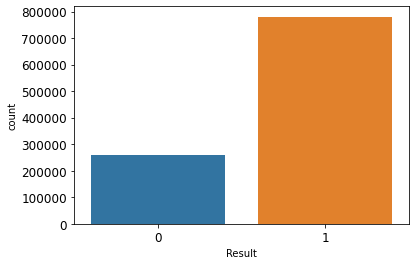

In [225]:
sns.countplot(df.Result)
plt.show()

# Anomaly Detection

In [228]:
#from sklearn.ensemble import IsolationForest
#clf = IsolationForest(random_state=42,contamination=0.1)
#clf.fit(X,Y)
#y_outliers = clf.predict(X)
#df['y_outliers'] = y_outliers
#df['y_train'] = Y
#df[df['y_outliers']==-1]

In [229]:
#df.drop(df.loc[df['y_outliers']==-1].index, inplace=True)

In [230]:
#df.head(2)

In [231]:
#df = df.drop(columns=['y_outliers','y_train'])
#df = df[['Age','Days_spend_hsptl','Admission_type','Home_or_self_care','ccs_diagnosis_code','ccs_procedure_code','Code_illness','Mortality_risk','Surg_Description','Emergency_dept_yes_No','ratio_of_total_costs_to_total_charges','Payment_Typology','Result']]

In [232]:
#df.info()

# Step 3: Model By different strategy...


Performing on sample datasets...

In [233]:
# taking 5% sample data from whole dataset

sample_data = df.sample(frac=0.02)

In [234]:
# checking for result column unique values counts..

sample_data.Result.value_counts()

1    15494
0     5331
Name: Result, dtype: int64

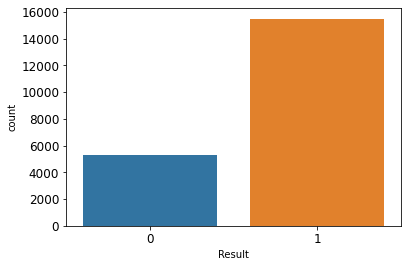

In [235]:
sns.countplot(sample_data.Result)
plt.show()

# 3.1 Upsampling before splitting the data into train & test¶

In [236]:
# seperating '0', & '1' label 

sample_minority = sample_data.loc[sample_data['Result']==0]
sample_majority = sample_data.loc[sample_data['Result']==1]

In [237]:
# doing upsampling of minority classes... taking 100 to 80% ratio

# sample_majority.shape[0]*0.80

from sklearn.utils import resample
sample_data_minority_upsampled = resample(sample_minority , replace=True, n_samples=12000, random_state=42)

In [238]:
# combining upsampled data to majority class data...

sample_data_upsampled = pd.concat([sample_majority, sample_data_minority_upsampled ], ignore_index=True)

In [239]:
# seperating indepedent & depedent variabales..

x = sample_data_upsampled.drop(['Result'],axis=1).values
y = sample_data_upsampled.Result.values

In [240]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify = y, random_state=42)

In [241]:
# finding best ccp_alph tree prunning parameter. So that it will avoid overfit issue

def find_alpha(x_train, x_test, y_train, y_test):
    
    import matplotlib.pyplot as plt
    from sklearn.ensemble import RandomForestClassifier
    
    
    ccp_alphas = np.arange(0.000, 0.040, 0.002)
    clfs = []
    for ccp_alpha in ccp_alphas:
        clf = RandomForestClassifier(n_estimators=15, random_state=42, ccp_alpha=ccp_alpha)
        clf.fit(x_train, y_train)
        clfs.append(clf)

    train_scores = [clf.score(x_train, y_train) for clf in clfs]
    test_scores = [clf.score(x_test, y_test) for clf in clfs]

    fig, ax = plt.subplots(figsize=(15,6))
    ax.set_xlabel("alpha")
    ax.set_ylabel("accuracy")
    ax.set_title("Accuracy vs alpha for training and testing sets")
    ax.plot(ccp_alphas, train_scores, marker='o', label="train",drawstyle="steps-post")
    ax.plot(ccp_alphas, test_scores, marker='o', label="test",drawstyle="steps-post")
    ax.set_xticks(np.arange(0.000,0.040, 0.002))
    ax.set_yticks(np.arange(0.70,1.01, 0.1))
    ax.legend()
    plt.grid(True)
    plt.rcParams['xtick.labelsize']=12
    plt.rcParams['ytick.labelsize']=12
    plt.show()

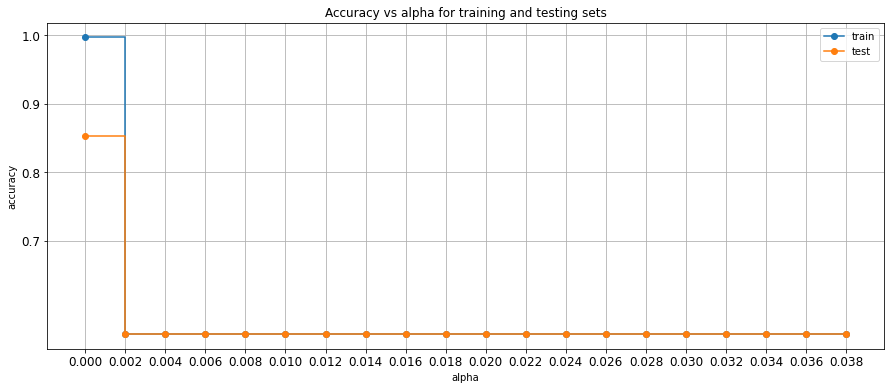

In [242]:
find_alpha(x_train, x_test, y_train, y_test)

* ccp_alph parameter should be zero for this case.


# Building Model with n_estimators=100

In [243]:
from sklearn.ensemble import RandomForestClassifier
sample_RF_upsampled = RandomForestClassifier(n_estimators=100, random_state=42)

In [244]:
clf_sample = sample_RF_upsampled.fit(x_train, y_train)

In [245]:
y_pred_train = clf_sample.predict(x_train)
y_pred = clf_sample.predict(x_test)

In [246]:
print(classification_report(y_train, y_pred_train ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9600
           1       1.00      1.00      1.00     12395

    accuracy                           1.00     21995
   macro avg       1.00      1.00      1.00     21995
weighted avg       1.00      1.00      1.00     21995



In [247]:
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      2400
           1       0.90      0.90      0.90      3099

    accuracy                           0.89      5499
   macro avg       0.88      0.88      0.88      5499
weighted avg       0.89      0.89      0.89      5499



In [248]:
cross_val_score(clf_sample, x, y)

array([0.87925077, 0.88434261, 0.87452264, 0.87706856, 0.86922517])

# Building Model with n_estimators=15

In [249]:
from sklearn.ensemble import RandomForestClassifier
sample_RF15_upsampled = RandomForestClassifier(n_estimators=15, random_state=42)

In [250]:
clf_15_sample = sample_RF_upsampled.fit(x_train, y_train)

In [251]:
y_pred_train = clf_15_sample.predict(x_train)
y_pred = clf_15_sample.predict(x_test)

In [252]:
print(classification_report(y_train, y_pred_train ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9600
           1       1.00      1.00      1.00     12395

    accuracy                           1.00     21995
   macro avg       1.00      1.00      1.00     21995
weighted avg       1.00      1.00      1.00     21995



In [253]:
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      2400
           1       0.90      0.90      0.90      3099

    accuracy                           0.89      5499
   macro avg       0.88      0.88      0.88      5499
weighted avg       0.89      0.89      0.89      5499



In [254]:
cross_val_score(clf_15_sample, x, y)

array([0.87925077, 0.88434261, 0.87452264, 0.87706856, 0.86922517])

In [255]:
y_pred_whole = clf_15_sample.predict(df.drop(['Result'],axis=1))

print(classification_report(df.Result.values, y_pred_whole))

              precision    recall  f1-score   support

           0       0.28      0.12      0.17    260904
           1       0.75      0.90      0.82    780361

    accuracy                           0.70   1041265
   macro avg       0.52      0.51      0.49   1041265
weighted avg       0.63      0.70      0.66   1041265



# 3.2 Upsampling after train_test_split...

3.1 Upsampling using sklearn resample

In [256]:
x = sample_data.drop(['Result'],axis=1).values
y = sample_data.Result.values

In [257]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify = y, random_state=42)

In [258]:
from collections import Counter
Counter(y_train)

Counter({0: 4265, 1: 12395})

In [259]:
x_train_df = pd.DataFrame(x_train, columns=sample_data.drop(['Result'],axis=1).columns)
y_train_df = pd.DataFrame(y_train, columns=['Result'])

df_train = pd.concat([x_train_df, y_train_df],axis=1)

In [260]:
df_train_majority = df_train.loc[df_train['Result']==1]
df_train_minority = df_train.loc[df_train['Result']==0]

In [261]:
df_train_majority.shape

(12395, 13)

In [262]:
df_train_minority.shape

(4265, 13)

In [263]:
# checking 80% row counts w.r.t majority class
12395*0.80

9916.0

In [264]:
# doing upsampling of minority classes... taking 100 to 80% ratio

# sample_majority.shape[0]*0.80

from sklearn.utils import resample
df_train_minority_upsampled = resample(df_train_minority , replace=True, n_samples=9990, random_state=42)

In [265]:
after_split_upsampled = pd.concat([df_train_majority, df_train_minority_upsampled])

In [266]:
# splitting into x_train, y_train only..note: we have alerady splitted test sets using k fold...

x_train_upsampled = after_split_upsampled.drop(['Result'],axis=1).values
y_train_upsampled = after_split_upsampled.Result.values

In [267]:
from sklearn.ensemble import RandomForestClassifier
sample_RF15_after_split_upsampled = RandomForestClassifier(n_estimators=15, random_state=42)

In [268]:
sample_RF15_after_split_upsampled = sample_RF15_after_split_upsampled.fit(x_train_upsampled, y_train_upsampled)

In [269]:
y_pred_train = sample_RF15_after_split_upsampled.predict(x_train_upsampled)
y_pred = sample_RF15_after_split_upsampled.predict(x_test)

In [270]:
Counter(y_test)

Counter({1: 3099, 0: 1066})

In [271]:
print(classification_report(y_train_upsampled, y_pred_train ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9990
           1       1.00      1.00      1.00     12395

    accuracy                           1.00     22385
   macro avg       1.00      1.00      1.00     22385
weighted avg       1.00      1.00      1.00     22385



In [272]:
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       0.25      0.14      0.18      1066
           1       0.74      0.86      0.80      3099

    accuracy                           0.68      4165
   macro avg       0.50      0.50      0.49      4165
weighted avg       0.62      0.68      0.64      4165



# Conclusion:

It is clear that, upsampling tech. is best suited for imbalanced dataset..when we upsample minority class before train_test_split

# Step 4: Model Building On whole dataset...

In [273]:
data_minority = df.loc[df['Result']==0]
data_majority = df.loc[df['Result']==1]

In [274]:
from sklearn.utils import resample
data_minority_upsampled = resample(data_minority, replace=True, n_samples=624290, random_state=42)
data_upsampled = pd.concat([data_majority, data_minority_upsampled ], ignore_index=True)

In [275]:
X = data_upsampled.drop(['Result'],axis=1).values
Y = data_upsampled.Result.values

In [276]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=30)

In [277]:
from sklearn.ensemble import RandomForestClassifier
model_rf_upsampled = RandomForestClassifier(n_estimators=15, random_state=42)

In [278]:
model_rf_upsampled.fit(x_train, y_train)

RandomForestClassifier(n_estimators=15, random_state=42)

In [279]:
y_pred_train = model_rf_upsampled.predict(x_train)
y_pred_test = model_rf_upsampled.predict(x_test)

In [280]:
# classification report...for train set
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98    499432
           1       0.99      0.99      0.99    624288

    accuracy                           0.99   1123720
   macro avg       0.98      0.99      0.99   1123720
weighted avg       0.99      0.99      0.99   1123720



In [281]:
# classification report...for test set
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82    124858
           1       0.88      0.81      0.84    156073

    accuracy                           0.83    280931
   macro avg       0.83      0.84      0.83    280931
weighted avg       0.84      0.83      0.83    280931



In [282]:
y_pred_whole = model_rf_upsampled.predict(df.drop(['Result'],axis=1))

print(classification_report(df.Result.values, y_pred_whole))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86    260904
           1       0.95      0.95      0.95    780361

    accuracy                           0.93   1041265
   macro avg       0.90      0.91      0.90   1041265
weighted avg       0.93      0.93      0.93   1041265



# Saving model...

In [283]:
from joblib import dump, load
dump(model_rf_upsampled, 'model_rf_upsampled.joblib')

['model_rf_upsampled.joblib']

In [284]:
from sklearn.metrics import f1_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1) 
lst_accu_stratified = [] 

x = df.drop(['Result'],axis=1).values
y = df.Result.values
   
for train_index, test_index in skf.split(x, y): 
    x_train_fold, x_test_fold = x[train_index], x[test_index] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    model_rf_upsampled.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(f1_score(y_test_fold, model_rf_upsampled.predict(x_test_fold)))

In [285]:
# Print the output. 
print('List of possible F1 score:', lst_accu_stratified) 
print('\nMaximum F1 score That can be obtained from this model is:', 
      (np.round(max(lst_accu_stratified)*100, 2)))
print('\nMinimum F1 score:', 
      (np.round(min(lst_accu_stratified)*100,2))) 
print('\nOverall F1 score:', 
     (np.round(np.mean(lst_accu_stratified)*100,2)))
print('\nStandard Deviation is:', np.round(np.std(lst_accu_stratified)))

List of possible F1 score: [0.8128341305055469, 0.8128008447853571, 0.813368416734548, 0.8128667323851101, 0.8120150143623301]

Maximum F1 score That can be obtained from this model is: 81.34

Minimum F1 score: 81.2

Overall F1 score: 81.28

Standard Deviation is: 0.0


# Predicting on different samples from dataset

# Building a model for small sample for deployment purpose

In [286]:
# taking sample data from dataset..

sample = df.sample(50000)

In [287]:
sample.head(2)

,Age,Days_spend_hsptl,Admission_type,Home_or_self_care,ccs_diagnosis_code,ccs_procedure_code,Code_illness,Mortality_risk,Surg_Description,Emergency_dept_yes_No,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
20214,1,2,5,7,657,0,1,1,0,1,1.237881,1,2
664337,3,16,1,7,659,0,2,1,0,1,0.363088,0,1


In [288]:
sample.shape

(50000, 13)

In [289]:
index= sample.index.to_list()

In [290]:
# checking memory size of sample data..

sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 20214 to 931396
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Age                                    50000 non-null  int64  
 1   Days_spend_hsptl                       50000 non-null  int32  
 2   Admission_type                         50000 non-null  int64  
 3   Home_or_self_care                      50000 non-null  int64  
 4   ccs_diagnosis_code                     50000 non-null  int64  
 5   ccs_procedure_code                     50000 non-null  int64  
 6   Code_illness                           50000 non-null  int64  
 7   Mortality_risk                         50000 non-null  int32  
 8   Surg_Description                       50000 non-null  int32  
 9   Emergency_dept_yes_No                  50000 non-null  int32  
 10  ratio_of_total_costs_to_total_charges  50000 non-null  float64
 1

* Now it is showing 4.6 MB size which will be ok for deployment part of view.

* Note: This model will may not be good fit on whole dataset. F1 score, Accuracy may drop in large proportion

In [291]:
# Checking for imbalance state

sample.Result.value_counts()

1    37631
0    12369
Name: Result, dtype: int64

In [292]:
# # seperating majority & minority classes

sample_1 = sample.loc[sample['Result']==1]
sample_0 = sample.loc[sample['Result']==0]

In [293]:
# and will do downsampling of class '1'

from sklearn.utils import resample
sample_0 = resample(sample_0, replace=True, n_samples=5500, random_state=42)

sample_upsampled = pd.concat([sample_0, sample_1], ignore_index=True)

In [294]:
sample_upsampled.shape

(43131, 13)

In [295]:
sample_upsampled.head()

,Age,Days_spend_hsptl,Admission_type,Home_or_self_care,ccs_diagnosis_code,ccs_procedure_code,Code_illness,Mortality_risk,Surg_Description,Emergency_dept_yes_No,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,2,3,1,7,106,201,1,1,0,1,0.342587,0,1
1,3,16,0,7,40,64,2,3,1,0,0.530171,0,2
2,3,1,1,7,127,0,1,1,0,1,0.300218,0,1
3,3,2,1,7,159,0,2,3,0,1,0.597093,0,2
4,4,11,5,18,237,168,3,2,0,0,0.523709,0,3


In [296]:
# Checking for imbalance state

sample_upsampled.Result.value_counts(normalize=True)

1    0.872482
0    0.127518
Name: Result, dtype: float64

In [297]:
sample_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43131 entries, 0 to 43130
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Age                                    43131 non-null  int64  
 1   Days_spend_hsptl                       43131 non-null  int32  
 2   Admission_type                         43131 non-null  int64  
 3   Home_or_self_care                      43131 non-null  int64  
 4   ccs_diagnosis_code                     43131 non-null  int64  
 5   ccs_procedure_code                     43131 non-null  int64  
 6   Code_illness                           43131 non-null  int64  
 7   Mortality_risk                         43131 non-null  int32  
 8   Surg_Description                       43131 non-null  int32  
 9   Emergency_dept_yes_No                  43131 non-null  int32  
 10  ratio_of_total_costs_to_total_charges  43131 non-null  float64
 11  Re

In [298]:
X = sample_upsampled.drop(['Result'],axis=1).values
Y = sample_upsampled.Result.values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=30)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=15, random_state=42)

model = model.fit(x_train, y_train)

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [299]:
# classification report...for train set
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      4400
           1       0.99      1.00      1.00     30104

    accuracy                           0.99     34504
   macro avg       0.99      0.97      0.98     34504
weighted avg       0.99      0.99      0.99     34504



In [300]:
# classification report...for train set
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.65      0.28      0.39      1100
           1       0.90      0.98      0.94      7527

    accuracy                           0.89      8627
   macro avg       0.78      0.63      0.67      8627
weighted avg       0.87      0.89      0.87      8627



In [301]:
y_pred_whole = model.predict(sample.drop(['Result'],axis=1))

print(classification_report(sample.Result.values, y_pred_whole))

              precision    recall  f1-score   support

           0       0.95      0.29      0.44     12369
           1       0.81      1.00      0.89     37631

    accuracy                           0.82     50000
   macro avg       0.88      0.64      0.67     50000
weighted avg       0.85      0.82      0.78     50000



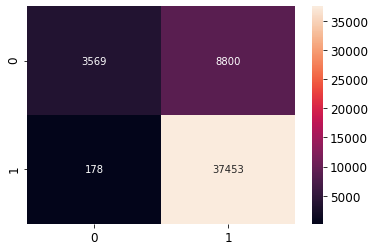

In [302]:
sns.heatmap(confusion_matrix(sample.Result.values, y_pred_whole), annot=True, fmt='.8g')
plt.show()

# Saving Model

In [303]:
from joblib import dump, load
dump(model, 'model.joblib') 

['model.joblib']

Saving sample data to deployment trial

In [304]:
index = sample.index.to_list()

In [305]:
sample_test_data = df.copy()

In [306]:
sample_test_data = sample_test_data.loc[index]

In [307]:
sample_test_data.to_csv('sample_test_data.csv', index=False)